# Inspecting transfusion.data file

## Inspecting transfusion.data file

Blood transfusion saves lives - from replacing lost blood during major surgery or a serious injury to treating various illnesses and blood disorders. Ensuring that there's enough blood in supply whenever needed is a serious challenge for the health professionals. According to WebMD, "about 5 million Americans need a blood transfusion every year".

Our dataset is from a mobile blood donation vehicle in Taiwan. The Blood Transfusion Service Center drives to different universities and collects blood as part of a blood drive. We want to predict whether or not a donor will give blood the next time the vehicle comes to campus.

The data is stored in datasets/transfusion.data and it is structured according to RFMTC marketing model (a variation of RFM). We'll explore what that means later in this notebook. First, let's inspect the data

In [1]:
%%bash
head transfusion.data

Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),"whether he/she donated blood in March 2007"
2 ,50,12500,98 ,1
0 ,13,3250,28 ,1
1 ,16,4000,35 ,1
2 ,20,5000,45 ,1
1 ,24,6000,77 ,0
4 ,4,1000,4 ,0
2 ,7,1750,14 ,1
1 ,12,3000,35 ,0
2 ,9,2250,22 ,1


## Loading the blood donations data

We now know that we are working with a typical CSV file (i.e., the delimiter is ,, etc.). We proceed to loading the data into memory.

In [8]:
# modules we'll use
import pandas as pd
import numpy as np
#Filter the unwanted warning
import warnings
warnings.simplefilter("ignore")

data = pd.read_csv("transfusion.data", delimiter=",")

# set seed for reproducibility
np.random.seed(0) 

data

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0
...,...,...,...,...,...
743,23,2,500,38,0
744,21,2,500,52,0
745,23,3,750,62,0
746,39,1,250,39,0


## Inspecting transfusion DataFrame

<p>Let's briefly return to our discussion of RFM model. RFM stands for Recency, Frequency and Monetary Value and it is commonly used in marketing for identifying your best customers. In our case, our customers are blood donors.

RFMTC is a variation of the RFM model. Below is a description of what each column means in our dataset:
<ul>
    <li>R (Recency - months since the last donation)</li>
    <li>F (Frequency - total number of donation)</li>
    <li>M (Monetary - total blood donated in c.c.)</li>
    <li>T (Time - months since the first donation)</li>
    <li>a binary variable representing whether he/she donated blood in March 2007 (1 stands for donating blood; 0 stands for not donating blood)</li>
</ul>
It looks like every column in our DataFrame has the numeric type, which is exactly what we want when building a machine learning model. Let's verify our hypothesis.</p>

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column                                      Non-Null Count  Dtype
---  ------                                      --------------  -----
 0   Recency (months)                            748 non-null    int64
 1   Frequency (times)                           748 non-null    int64
 2   Monetary (c.c. blood)                       748 non-null    int64
 3   Time (months)                               748 non-null    int64
 4   whether he/she donated blood in March 2007  748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB


Since, dtypes:int64 every column in our DataFrame has the numeric type.

In [10]:
data.describe()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
count,748.000000,748.000000,748.000000,748.000000,748.000000
mean,9.506684,5.514706,1378.676471,34.282086,0.237968
std,8.095396,5.839307,1459.826781,24.376714,0.426124
min,0.000000,1.000000,250.000000,2.000000,0.000000
25%,2.750000,2.000000,500.000000,16.000000,0.000000
50%,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,14.000000,7.000000,1750.000000,50.000000,0.000000
max,74.000000,50.000000,12500.000000,98.000000,1.000000


In [11]:
data.isnull().sum()

Recency (months)                              0
Frequency (times)                             0
Monetary (c.c. blood)                         0
Time (months)                                 0
whether he/she donated blood in March 2007    0
dtype: int64

We have no missing values and we have 748 rows and 5 Columns. The features are ‘Recency(Months)', 'Frequency(Months)’, ‘Monetary (c.c. blood)’, ‘Time (Months)’, ‘Target’

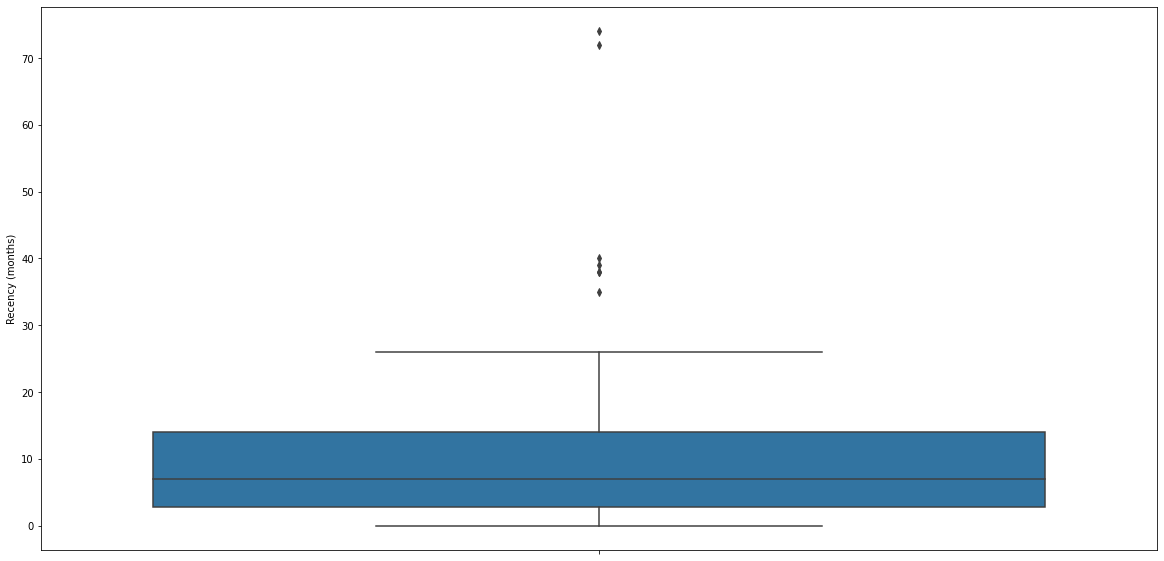

In [12]:
#Importing library for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Boxplot for Months since Last Donation
plt.figure(figsize=(20,10)) 
sns.boxplot(y="Recency (months)",data=data)

We can see that most of donations happened around 10th month.

## Creating target column

We are aiming to predict the value in whether he/she donated blood in March 2007 column. Let's rename this it to target so that it's more convenient to work with.

In [14]:
data.rename(columns={'whether he/she donated blood in March 2007':'target'}, inplace=True)

In [15]:
data.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),target
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


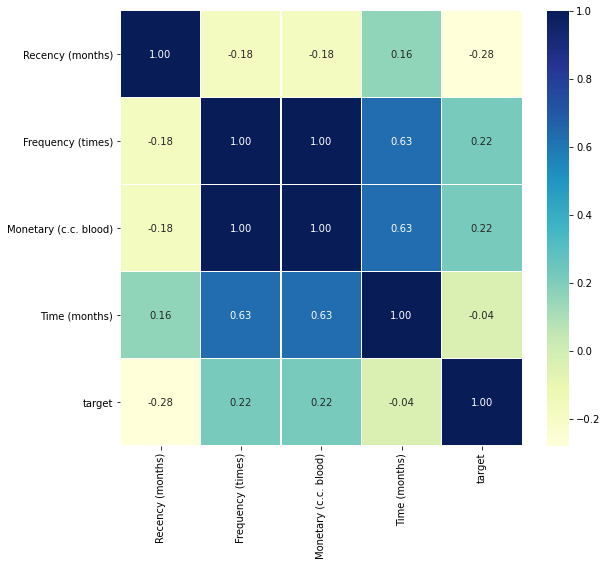

In [16]:
from sklearn.metrics import confusion_matrix

#Correlation between all variables 
corr_mat=data.corr()
f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(corr_mat, ax = ax, cmap ="YlGnBu", linewidths = 0.1,fmt = ".2f",annot=True)

## Checking target incidence

We want to predict whether or not the same donor will give blood the next time the vehicle comes to campus. The model for this is a binary classifier, meaning that there are only 2 possible outcomes:
<ul>
    <li>0 - the donor will not give blood</li>
    <li>1 - the donor will give blood</li>
</ul>
Target incidence is defined as the number of cases of each individual target value in a dataset. That is, how many 0s in the target column compared to how many 1s? Target incidence gives us an idea of how balanced (or imbalanced) is our dataset.

In [17]:
data.target.value_counts(normalize=True)

0    0.762032
1    0.237968
Name: target, dtype: float64

## Splitting transfusion into train and test datasets

We'll now use train_test_split() method to split transfusion DataFrame.

Target incidence informed us that in our dataset 0s appear 76% of the time. We want to keep the same structure in train and test datasets, i.e., both datasets must have 0 target incidence of 76%. This is very easy to do using the train_test_split() method from the scikit learn library - all we need to do is specify the stratify parameter. In our case, we'll stratify on the target column.

In [29]:
import sklearn
from sklearn.model_selection import train_test_split

# split data into training and validation data, for both features and target
# The split is based on a random number generator. Supplying a numeric value to
# the random_state argument guarantees we get the same split every time we
# run this script.

train_X, val_X, train_y, val_y = train_test_split(data.drop(columns=['target']),data.target,
                                                  test_size=0.25,random_state=42, stratify=data.target)
print(sklearn.__version__)

0.23.2


In [19]:
train_X.shape

(561, 4)

In [20]:
train_X.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months)
334,16,2,500,16
99,5,7,1750,26
116,2,7,1750,46
661,16,2,500,16
154,2,1,250,2


## Selecting model using TPOT

TPOT is a Python Automated Machine Learning tool that optimizes machine learning pipelines using genetic programming.

TPOT will automatically explore hundreds of possible pipelines to find the best one for our dataset. Note, the outcome of this search will be a scikit-learn pipeline, meaning it will include any pre-processing steps as well as the model.

We are using TPOT to help us zero in on one model that we can then explore and optimize further.

In [21]:
from tpot import TPOTClassifier
from sklearn.metrics import roc_auc_score

# Initialize TPOTClassifier
tpot = TPOTClassifier(generations=7,
                     population_size=20,
                     verbosity=2,
                     scoring='roc_auc',
                     random_state=42,
                     disable_update_check=True,
                     config_dict='TPOT light')
tpot.fit(train_X, train_y)

# AUC Score
auc_score = roc_auc_score(val_y, tpot.predict_proba(val_X)[:, 1])
print("\nAUC SCORE: {:.4f}".format(auc_score))

# Best Pipeline steps
print("\nBEST PIPELINE STEPS:", end="\n")
for i, (y, z) in enumerate(tpot.fitted_pipeline_.steps, start=1):
    print("{}. {}".format(i, z))


Generation 1 - Current best internal CV score: 0.7422459184429089

Generation 2 - Current best internal CV score: 0.7422459184429089

Generation 3 - Current best internal CV score: 0.7422459184429089

Generation 4 - Current best internal CV score: 0.7422459184429089

Generation 5 - Current best internal CV score: 0.7456308339276876

Generation 6 - Current best internal CV score: 0.7464101394881147

Generation 7 - Current best internal CV score: 0.7464101394881147

Best pipeline: LogisticRegression(CombineDFs(Normalizer(StandardScaler(input_matrix), norm=l2), StandardScaler(input_matrix)), C=25.0, dual=False, penalty=l2)

AUC SCORE: 0.7920

BEST PIPELINE STEPS:
1. FeatureUnion(transformer_list=[('pipeline',
                                Pipeline(steps=[('standardscaler',
                                                 StandardScaler()),
                                                ('normalizer', Normalizer())])),
                               ('standardscaler', StandardScaler())

## Checking the variance

TPOT picked LogisticRegression as the best model for our dataset with no pre-processing steps, giving us the AUC score of 0.7637. This is a great starting point. Let's see if we can make it better.

One of the assumptions for linear regression models is that the data and the features we are giving it are related in a linear fashion, or can be measured with a linear distance metric. If a feature in our dataset has a high variance that's an order of magnitude or more greater than the other features, this could impact the model's ability to learn from other features in the dataset.

Correcting for high variance is called normalization. It is one of the possible transformations you do before training a model. Let's check the variance to see if such transformation is needed.

In [22]:
# train_X Variance
train_X.var().round(3)

Recency (months)              66.929
Frequency (times)             33.830
Monetary (c.c. blood)    2114363.700
Time (months)                611.147
dtype: float64

We observed that Monetary (c.c. blood) variance is very high when compared to any other column in the dataset.

##  Log normalization

Monetary (c.c. blood)'s variance is very high in comparison to any other column in the dataset. This means that, unless accounted for, this feature may get more weight by the model (i.e., be seen as more important) than any other feature.

One way to correct for high variance is to use log normalization

In [23]:
train_X_norm = train_X.copy()
val_X_norm = val_X.copy()

#norm_column = train_X_norm.var().idxmax(axis=1)
norm_column = 'Monetary (c.c. blood)'

# Log Normalization
for df in [train_X_norm, val_X_norm]:
    # Adding Normalized Column
    df['monetary_log'] = np.log(df[norm_column])
    # Drop normalized column
    df.drop(columns=norm_column, inplace=True)
    
# Variance of train_X_norm
print(train_X_norm.var().round(3))

Recency (months)      66.929
Frequency (times)     33.830
Time (months)        611.147
monetary_log           0.837
dtype: float64


## Training the linear regression model

The variance looks much better now. Notice that now Time (months) has the largest variance, but it's not the orders of magnitude higher than the rest of the variables, so we'll leave it as is.

We are now ready to train the linear regression model.

In [24]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(solver='liblinear',
                                          random_state=42)
# Training the model
log_reg.fit(train_X_norm, train_y)

LogisticRegression(random_state=42, solver='liblinear')

In [25]:
# AUC Score
log_reg_auc = roc_auc_score(val_y, log_reg.predict_proba(val_X_norm)[:, 1])
print("\nAUC SCORE: {:.4f}".format(log_reg_auc))


AUC SCORE: 0.7891


## Conclusion

The demand for blood fluctuates throughout the year. As one prominent example, blood donations slow down during busy holiday seasons. An accurate forecast for the future supply of blood allows for an appropriate action to be taken ahead of time and therefore saving more lives.

In this notebook, we explored automatic model selection using TPOT and AUC score we got was 0.7637. This is better than simply choosing 0 all the time (the target incidence suggests that such a model would have 76% success rate). We then log normalized our training data and improved the AUC score. In the field of machine learning, even small improvements in accuracy can be important, depending on the purpose.

Another benefit of using logistic regression model is that it is interpretable. We can analyze how much of the variance in the response variable (target) can be explained by other variables in our dataset.

In [30]:
log_reg1 = LogisticRegression(solver='liblinear',
                                          random_state=42)
# Training the model
log_reg1.fit(train_X, train_y)
import pickle
pickle.dump(log_reg1, open('predict_blood1.pkl', 'wb'))

In [31]:
# model = pickle.load(open('predict_blood1.pkl', 'rb'))

In [32]:
with open('predict_blood1.pkl', 'rb') as f:
    #model = pickle.load(f)
    auc_score = roc_auc_score(val_y, log_reg.predict_proba(val_X_norm)[:, 1])
    print("\nAUC SCORE: {:.4f}".format(auc_score))


AUC SCORE: 0.7891
